In [19]:
# Importar as Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [20]:
# Importar o dataset
data = pd.read_csv("boston.csv")
data = data.drop(['CAT. MEDV', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
# Separar Atribuos e Targets
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values

In [22]:
# Separando entre conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=0)

In [23]:
# Modelo de regressão linear
regr = linear_model.LinearRegression()

In [24]:
# Ajustar o Modelo de Regressão (Aprendizado)
regr.fit(X_train, y_train)

LinearRegression()

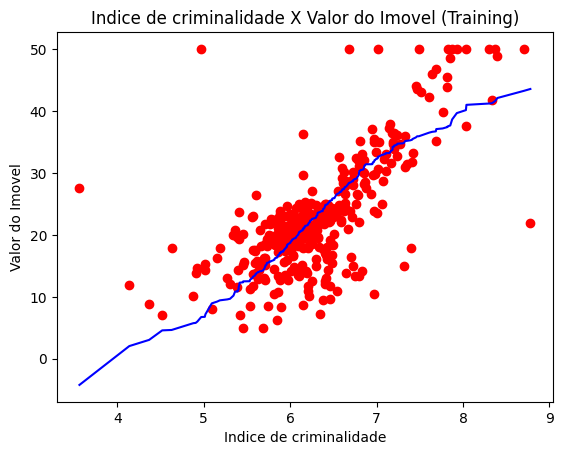

In [25]:
# Grafico com os dados de treinamento
plt.scatter(X_train[:,5], y_train, color='red')
plt.plot(sorted(X_train[:,5]), sorted(regr.predict(X_train)), color='blue')
plt.title("Indice de criminalidade X Valor do Imovel (Training)")
plt.xlabel("Indice de criminalidade")
plt.ylabel("Valor do Imovel")
plt.show()

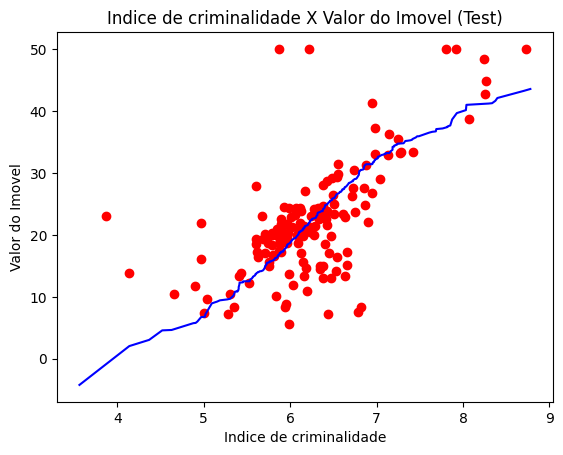

In [26]:
# Grafico com os dados de teste
plt.scatter(X_test[:,5], y_test, color='red')
plt.plot(sorted(X_train[:,5]), sorted(regr.predict(X_train)), color='blue')
plt.title("Indice de criminalidade X Valor do Imovel (Test)")
plt.xlabel("Indice de criminalidade")
plt.ylabel("Valor do Imovel")
plt.show()

In [27]:
# Avaliar as métricas do modelo ajustado
y_pred = regr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coeficiente de Determinação (R2):', r2_score(y_test, y_pred))

Mean Squared Error: 27.195965766883276
Coeficiente de Determinação (R2): 0.6733825506400186


In [28]:
# Coeficientes
print('Slop:', regr.coef_)
print('Bias:', regr.intercept_)

Slop: [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Bias: 37.93710774183256


In [29]:
# Previsões
print('Valor do Imovel Estimado:', regr.predict([[35.0]]))

ValueError: X has 1 features, but LinearRegression is expecting 13 features as input.